In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel('Data_Train_restaurant.xlsx')
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
df_test=pd.read_excel('Data_Test_restaurant.xlsx')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [4]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In training dataset Restaurant_id and cost column as int data type and remaining  column are object datatype

In [5]:
df_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

There is no target column in testing dataset only one column with int dtype remaining column are object type 

In [6]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In dataset city,locality,rating and vote column having a null value

In [7]:
imp=SimpleImputer(strategy='most_frequent')
df_train['CITY']=imp.fit_transform(df_train['CITY'].values.reshape(-1,1))
df_train['VOTES']=imp.fit_transform(df_train['VOTES'].values.reshape(-1,1))
df_train['LOCALITY']=imp.fit_transform(df_train['LOCALITY'].values.reshape(-1,1))
df_train['RATING']=imp.fit_transform(df_train['RATING'].values.reshape(-1,1))

In [8]:
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

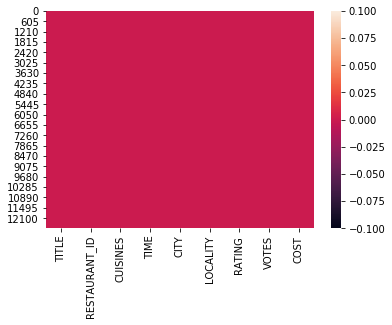

In [9]:
sns.heatmap(df_train.isnull())

after observing above heatmap there is no null value in training dataset

In [10]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [11]:
df_test['CITY']=imp.fit_transform(df_test['CITY'].values.reshape(-1,1))
df_test['VOTES']=imp.fit_transform(df_test['VOTES'].values.reshape(-1,1))
df_test['LOCALITY']=imp.fit_transform(df_test['LOCALITY'].values.reshape(-1,1))
df_test['RATING']=imp.fit_transform(df_test['RATING'].values.reshape(-1,1))

In [12]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [13]:
#Checking value count for each catogorical data
lst=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']
for i in lst:
    print(i,'\n',df_train[i].value_counts())

TITLE 
 QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
                                ... 
MEAT SHOP                          1
CASUAL DINING,DESSERT PARLOR       1
BEVERAGE SHOP,FOOD COURT           1
QUICK BITES,BAR                    1
MICROBREWERY,LOUNGE                1
Name: TITLE, Length: 113, dtype: int64
RESTAURANT_ID 
 7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64
CUISINES 
 South Indian                                      532
North Indian                                      526
North Indian, Chinese                             501
Fast Food                                         286
Chinese                                           167
                                                 ... 
Continental, American, It

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [15]:
df_train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


mean is greater than median so data is right skwed and maximum difference between 75% and MAX in column COST so outlieres iss present

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 <a list of 86 Text xticklabel objects>)

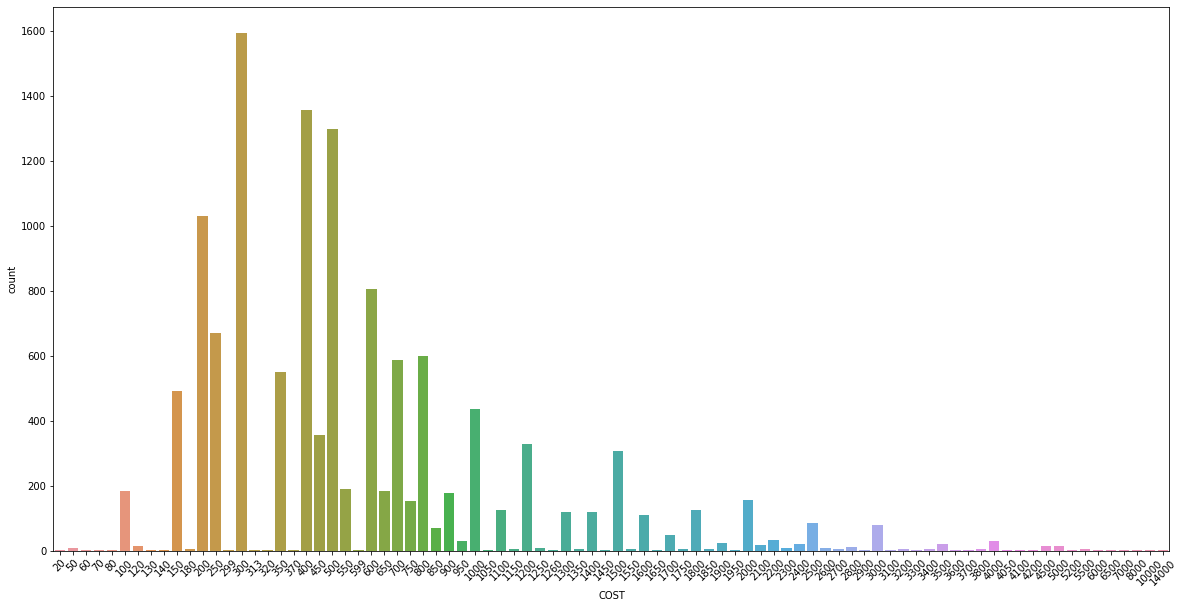

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(df_train['COST'])
plt.xticks(rotation=45)

1600 time 300 bill is paid

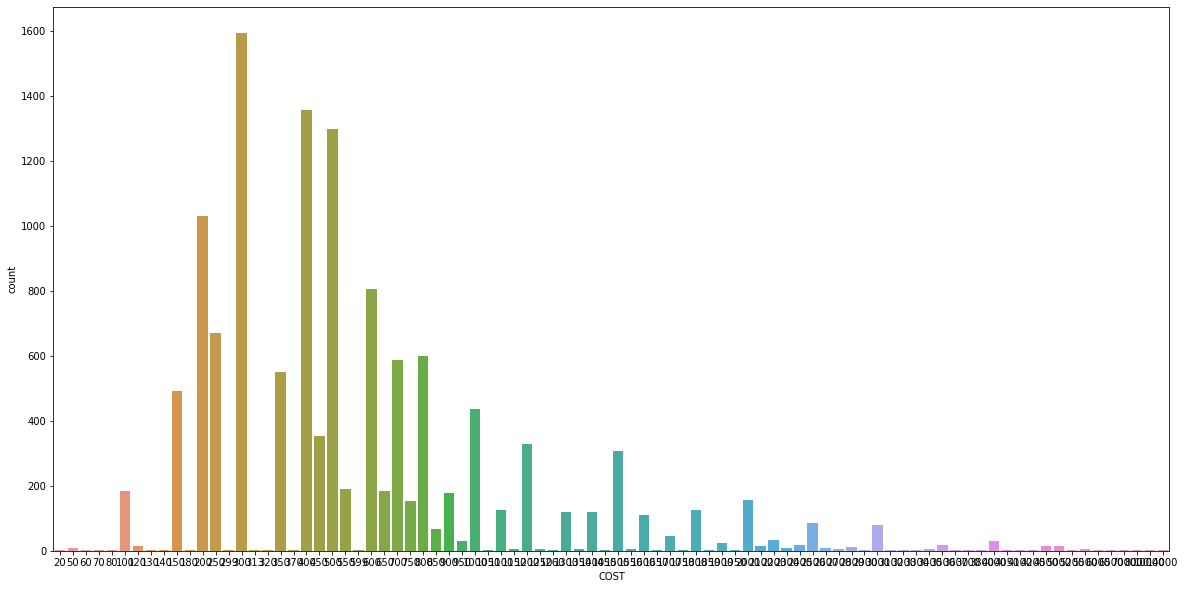

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(df_train['COST'])

most frequent rating is 3.9 it is used around 1220 times

# Data Preprocessing

In [18]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [19]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [20]:
df_train['TITLE'].value_counts()[:20]

QUICK BITES               4218
CASUAL DINING             3652
None                      1003
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
FINE DINING                308
BAKERY                     302
BEVERAGE SHOP              156
BAR,CASUAL DINING          128
LOUNGE                      98
BAKERY,QUICK BITES          92
BAR                         91
FOOD COURT                  78
CASUAL DINING,CAFÉ          56
MESS                        53
KIOSK                       53
BAKERY,DESSERT PARLOR       51
PUB                         50
SWEET SHOP,QUICK BITES      48
Name: TITLE, dtype: int64

In [21]:

#converssion catogorical column into numerical coulmn
lst=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']
le=LabelEncoder()
for i in lst:
    df_train[i]=le.fit_transform(df_train[i])

In [22]:
#converssion catogorical column into numerical coulmn
lst=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']
le=LabelEncoder()
for i in lst:
    df_test[i]=le.fit_transform(df_test[i])

In [23]:
#Checking the coorelation
cor=df_train.corr()
cor

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.002473,0.244866,0.053914,-0.016281,0.026614,-0.039748,0.009756,-0.263581
RESTAURANT_ID,0.002473,1.000000,0.056269,0.008185,0.005123,-0.004197,0.032382,0.010870,0.040612
CUISINES,0.244866,0.056269,1.000000,0.104741,0.023931,0.016504,-0.038163,-0.001907,-0.014078
TIME,0.053914,0.008185,0.104741,1.000000,-0.011372,-0.008062,-0.035337,0.016003,0.018248
CITY,-0.016281,0.005123,0.023931,-0.011372,1.000000,0.043072,0.026137,0.012734,0.044555
LOCALITY,0.026614,-0.004197,0.016504,-0.008062,0.043072,1.000000,-0.023361,0.005459,-0.015050
RATING,-0.039748,0.032382,-0.038163,-0.035337,0.026137,-0.023361,1.000000,-0.010109,0.236941
VOTES,0.009756,0.010870,-0.001907,0.016003,0.012734,0.005459,-0.010109,1.000000,-0.013715
COST,-0.263581,0.040612,-0.014078,0.018248,0.044555,-0.015050,0.236941,-0.013715,1.000000


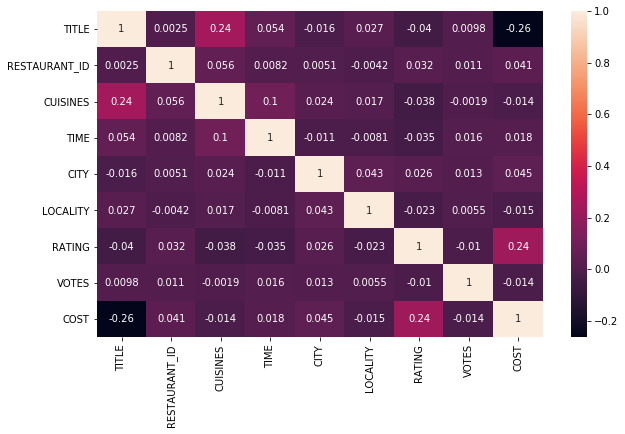

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

all column are normally correlated with target column COST

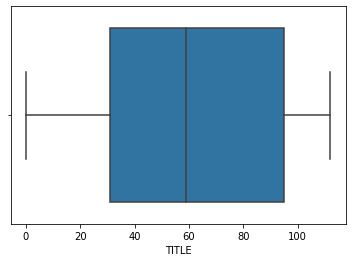

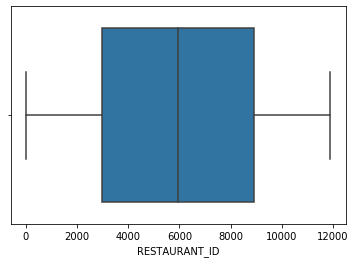

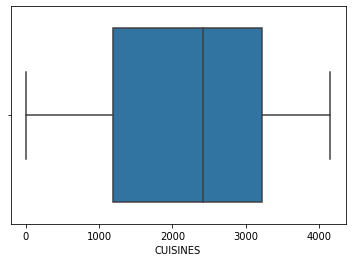

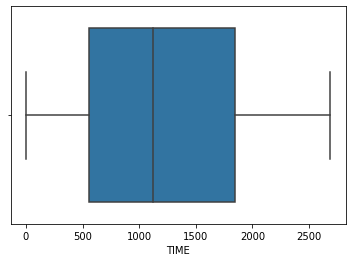

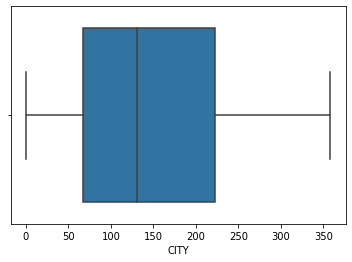

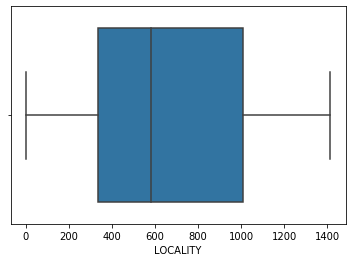

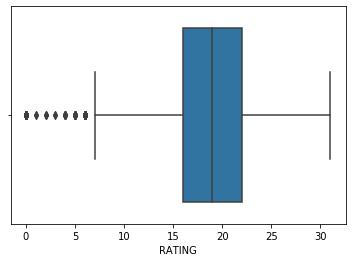

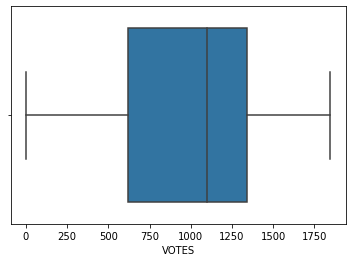

In [25]:
#Checking outliers in dataset
lst=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']
for i in lst:
    plt.figure(i)
    sns.boxplot(df_train[i])

Outlier present in Rating column

In [26]:
df_train.skew()

TITLE           -0.069803
RESTAURANT_ID    0.003759
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
RATING          -0.803390
VOTES           -0.316806
COST             3.978801
dtype: float64

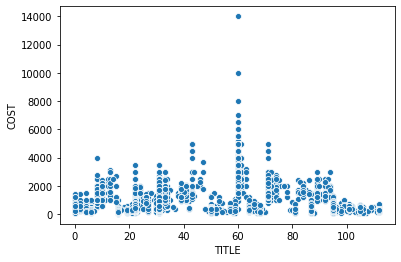

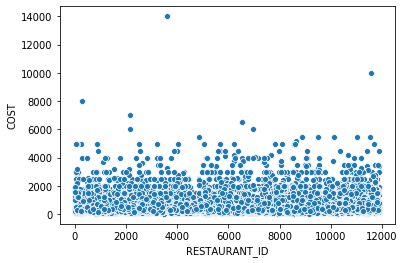

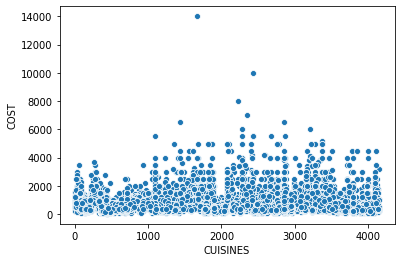

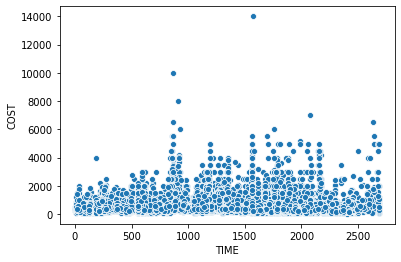

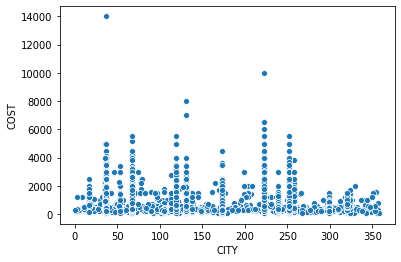

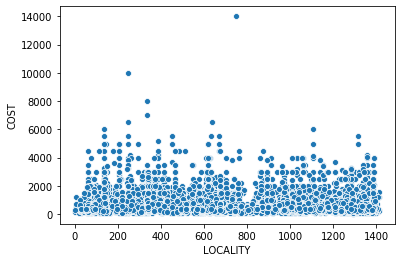

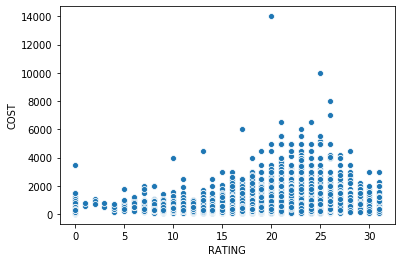

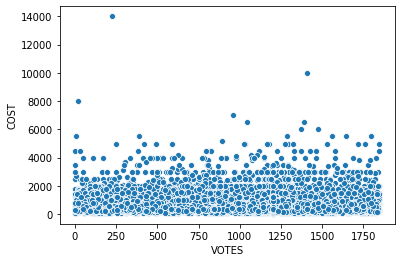

In [27]:
#Plotting the skewness
lst=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']
for i in lst:
    plt.figure(i)
    sns.scatterplot(x=df_train[i],y=df_train['COST'])

In [28]:
x=df_train.drop('COST',axis=1)
y=df_train['COST']
print(x)
print(y)

       TITLE  RESTAURANT_ID  CUISINES  TIME  CITY  LOCALITY  RATING  VOTES
0         31           7196      2627   739   320       285      17   1278
1         33          10075       289  1885    67      1046      23    950
2         31           8349      2976   661    67      1101      19    712
3         95           4876      4130   275   222       136      22    787
4         50          11747      1766   615   222       620      19    470
...      ...            ...       ...   ...   ...       ...     ...    ...
12685     95          10100      2934  1144   131       342      19   1349
12686     33           7390      2143  1177   222       133      24    191
12687     71           8518      2088  1137   239      1342      21   1428
12688     31           4718      3506  1837    67       631      16    996
12689     31           4941      2946   835   131      1333      15   1505

[12690 rows x 8 columns]
0        1200
1        1500
2         800
3         800
4         300
    

# Model Deployment 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [30]:
print(x_train.shape,'\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(8883, 8) 	 (3807, 8)
(8883,) 	 (3807,)


In [31]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [32]:
model=[LinearRegression(),Lasso(),Ridge(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('\n',m,'Model')
    print('Score',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("Errors:")
    print("Mean Squered=",mean_squared_error(y_test,pred))
    print("Mean absulate=",mean_absolute_error(y_test,pred))
    print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_Score=',r2_score(y_test,pred))


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Model
Score 0.12604319454393864
Errors:
Mean Squered= 301827.0797706389
Mean absulate= 341.20026058073273
RMSC= 549.3879137464155
r2_Score= 0.1306472488296928

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Model
Score 0.1260431292929376
Errors:
Mean Squered= 301821.0537840141
Mean absulate= 341.1816426902299
RMSC= 549.3824294460227
r2_Score= 0.1306646054832269

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Model
Score 0.1260431945434769
Errors:
Mean Squered= 301827.06346577546
Mean absulate= 341.2002081563143
RMSC= 549.387898907298
r2_Score= 0.13064729579260237

 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, s

In [33]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
rf=RandomForestRegressor()
GB=GradientBoostingRegressor()

In [34]:
model=[rf,AdaBoostRegressor(),GB,BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('\n',m,'Model')
    print('Score',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("Errors:")
    print("Mean Squered=",mean_squared_error(y_test,pred))
    print("Mean absulate=",mean_absolute_error(y_test,pred))
    print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_Score=',r2_score(y_test,pred))


 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) Model
Score 0.9581929813681113
Errors:
Mean Squered= 104205.56973089046
Mean absulate= 188.68765169424745
RMSC= 322.80887492584594
r2_Score= 0.6998566238600588

 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) Model
Score -0.4761879894486598
Errors:
Mean Squered= 617135.1847217315
Mean absulate= 688.083271401224
RMSC= 785.5795215773712
r2_Score= -0.7775349086951717

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, 

After observation we conclude Gradient Boosting Regressor is our best model

In [35]:
score=cross_val_score(GB,x,y,cv=4)
print('cross validation=',score)
print(score.mean(),score.std())

cross validation= [0.65199746 0.70067112 0.70058688 0.71418026]
0.6918589282789136 0.023669656245810453


In [36]:
predicted=GB.predict(df_test)

In [37]:
predicted

array([ 760.34253092, 1821.6548032 ,  609.03739402, ...,  933.45307369,
        999.55493307,  965.84747084])

In [38]:
from sklearn.externals import joblib
joblib.dump(rf,'GB_Resturant.pkl')

['GB_Resturant.pkl']